Aer backends:  [<QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>]
First simulation:  COMPLETED
Output:  {'00': 245, '11': 239, '10': 280, '01': 236}


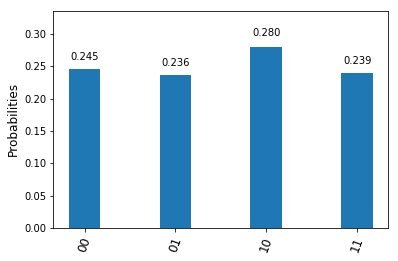

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import available_backends, execute, Aer, backends, IBMQ
from qiskit.backends.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
import math

# decide, on which backend you want to run the grover algorithmus
backendIBMQ = False

# define the number of your Qbits
N = 2

try:
    # Create a Quantum-Register with N qubits / initialize N-Qbits.
    q = QuantumRegister(N)
    c = ClassicalRegister(N)
    qc = QuantumCircuit(q, c)
    
    # Create superposition
    qc.h(q[0])
    qc.h(q[1])

    n = 0
    # avarage of ~O(sqrt(N)) repititions
    while n < 1:
        # apply the oracle
        qc.h(q[1]);
        qc.cx(q[0],q[1]);
        qc.h(q[1]);
        
        qc.h(q[0]);
        qc.h(q[1]);

        
        n = n + 1

    # measure
    qc.measure(q, c)
      
        
except QISKitError as ex:
        print('There was an error in the circuit!. Error = {}'.format(ex))

# run the code on a real quantumcomputer from IBM
if backendIBMQ:
    # Authenticate for access to remote backends
    try:
        import Qconfig
        IBMQ.load_accounts()    
        try:
            # See a list of available local simulators
            least_busy_device = least_busy(IBMQ.backends(simulator=False))
            print("Running on current least busy device: ", least_busy_device)

            #running the job twice and get counts
            result_exp1 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            result_exp2 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            counts01 = result_exp1.get_counts(qc)
            counts02 = result_exp2.get_counts(qc)

            # Show the results
            print("First experiment: ", result_exp1)
            print("Output: ", counts01)
            print("Second experiment: ", result_exp2)
            print("Output: ", counts02)
            legend = ['First experiment', 'Second experiment']
            plot_histogram([counts01,counts02], legend=legend, options={'label':'binary'})
            circuit_drawer(qc)
        except:
            print("All devices are currently unavailable. Try again later.")
    except:
        print("""WARNING: There's no connection with the API for remote backends.
                 Have you initialized a file with your personal token?
                 For now, there's only access to local simulator backends...""")
        
# or run the code on your own system with the simulation backend Aer
else:
    # See a list of available local simulators
    print("Aer backends: ", Aer.backends())
    backend_sim = Aer.get_backend('qasm_simulator')

    # Compile and run the Quantum circuit on a simulator backend
    sim_result1 = execute(qc, backend_sim, shots=1000).result()
    #sim_result2 = execute(qc, backend_sim, shots=1000).result()
    counts1 = sim_result1.get_counts(qc)
    #counts2 = sim_result2.get_counts(qc)

    # Show the results as text and plot
    print("First simulation: ", sim_result1)
    print("Output: ", counts1)
    #print("Second simulation: ", sim_result2)
    #print("Output: ", counts2)
    #legend = ['First execution', 'Second execution']
    plot_histogram(counts1)
    circuit_drawer(qc)

In [4]:

from qiskit.tools.visualization import circuit_drawer

qp = QuantumProgram()
qr = qp.create_quantum_register('qr', 3)
cr = qp.create_classical_register('cr', 1)
qc = qp.create_circuit('test', [qr], [cr])
qc.cu1(2.3, qr[0], qr[2])
qc.measure(qr[1], cr[0])

circuit_drawer(qc)

ImportError: cannot import name 'QuantumProgram' from 'qiskit' (C:\Users\also\AppData\Local\Continuum\anaconda3\envs\Qiskitenv\lib\site-packages\qiskit\__init__.py)